# Important Library


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from sklearn import impute
warnings.filterwarnings("ignore")

# Loading dataset

In [19]:
df = pd.read_json("data/output.json")
df = df.drop(['start_date'], axis = 1)
df = df.drop_duplicates()
df.shape

(4625, 18)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4625 entries, 0 to 5047
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     4625 non-null   object 
 1   description               4608 non-null   object 
 2   address                   4625 non-null   object 
 3   area                      4625 non-null   object 
 4   end_date                  0 non-null      float64
 5   floor_number              4625 non-null   object 
 6   bedroom_number            4625 non-null   object 
 7   is_dinning_room           4625 non-null   bool   
 8   is_kitchen                4625 non-null   bool   
 9   is_terrace                4625 non-null   bool   
 10  is_car_pack               4625 non-null   bool   
 11  is_owner                  4625 non-null   bool   
 12  type                      4625 non-null   object 
 13  direction                 4625 non-null   object 
 14  street_in_fro

In [21]:
df = df.drop(['end_date','description'], axis = 1)
df

,price,address,area,floor_number,bedroom_number,is_dinning_room,is_kitchen,is_terrace,is_car_pack,is_owner,type,direction,street_in_front_of_house,width,height,law
0,"10,3 tỷ","Đường Lạc Long Quân, Phường Thụy Khuê, Quận T...",48 m,4,4,False,False,False,False,False,Nhà trong hẻm,_,3m,---,---,Sổ hồng/ Sổ đỏ
1,"8,8 tỷ","Đường Vĩnh Tuy, Phường Vĩnh Tuy, Quận Hai Bà...",53 m,5,3,True,True,True,False,False,Nhà trong hẻm,Đông Nam,3m,6m,9m,Sổ hồng/ Sổ đỏ
2,"2,1 tỷ","Xã Bình Yên, Huyện Thạch Thất, Hà Nội",66 m,---,---,False,False,False,False,False,"Đất thổ cư, đất ở",_,5m,5m,14m,Sổ hồng/ Sổ đỏ
3,160 triệu,"Đường Hà Trì 1, Phường Hà Cầu, Quận Hà Đông, ...",45 m,3,4,True,True,False,False,False,Nhà trong hẻm,Nam,3m,8m,6m,---
4,"2,25 tỷ / m","Tỉnh lộ 420, Xã Bình Yên, Huyện Thạch Thất, H...",79 m,---,---,False,False,False,False,False,"Đất thổ cư, đất ở",Đông,6m,5m,15m,---
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5043,23 tỷ,"Phố Liễu Giai, Phường Liễu Giai, Quận Ba Đình...",102 m,5,4,True,True,True,True,False,"Biệt thự, nhà liền kề",_,50m,"9,2m",---,Sổ hồng/ Sổ đỏ
5044,200 triệu / m,"Đường Trường Chinh, Phường Khương Mai, Quận T...",322 m,10,6,True,True,True,True,False,Văn phòng,_,50m,"12,8m",---,Sổ hồng/ Sổ đỏ
5045,75 tỷ,"Phố Trích Sài, Phường Thụy Khuê, Quận Tây Hồ,...",132 m,6,4,True,True,True,True,False,Nhà mặt tiền,_,30m,"9,6m",---,Sổ hồng/ Sổ đỏ
5046,"48,4 tỷ","Đường Trường Chinh, Phường Ngã Tư Sở, Quận ...",105 m,9,4,True,True,True,True,False,Nhà mặt tiền,_,40m,"7,1m",---,Sổ hồng/ Sổ đỏ


# Preprocessing

In [22]:
def convert_area(area):
    for i in range(len(area)):
        try:
            if re.search("m$", area[i]):
                area[i] = re.sub("m", "", area[i])
                area[i] = re.sub(",", ".", area[i])
                area[i] = float(area[i])
            else:
                area[i] = np.nan
        except:
            area[i] = np.nan
    return area

def convert_direction(direction):
    for i in range(len(direction)):
        if (direction[i] == '_'):
            direction[i] = np.nan
        else:
            continue
    return direction

def convert_law(law):
    for i in range(len(law)):
        if law[i] == "---":
            law[i] = np.nan
        else:
            continue
    return law
        
def convert_price(price):
    for i in range(len(price)):
        try:
            if re.search("tỷ $", price[i]):
                price[i] = price[i].split(' ')[1]
                price[i] = re.sub(",", ".", price[i])
                price[i] = float(price[i])
            else:
                price[i] = np.nan
        except:
            price[i] = np.nan
    return price

def convert_address(address):
    city = []
    district = []
    for i in range(len(address)):
        address[i] = re.split(', ', address[i])
        try:
            if re.search('Quận ', address[i][-2]):
                address[i][-2] = re.sub('Quận ', '', address[i][-2])
            else:
                address[i][-2] = re.sub('Huyện ', '', address[i][-2])
        except:
            address[i][-2] = np.nan
        district.append(address[i][-2])
        city.append(address[i][-1])
        
    return city, district

In [23]:
price = df['price'].tolist()
area = df['area'].tolist()
width = df['width'].tolist()
height = df['height'].tolist()
street_infront_house = df['street_in_front_of_house'].tolist()
direction = df['direction'].tolist()
law = df['law'].tolist()
address = df['address'].tolist()

area = convert_area(area)
width = convert_area(width)
height = convert_area(height)
street_infront_house = convert_area(street_infront_house)
direction = convert_direction(direction)
price = convert_price(price)
law = convert_law(law)
city, district = convert_address(address)

df['price'] = price
df['area'] = area
df['width'] = width
df['height'] = height
df['street_in_front_of_house'] = street_infront_house
df['direction'] = direction
df['law'] = law
df['city'] = city
df['district'] = district

bedroom_no = df['bedroom_number'].tolist()
floor_no = df['floor_number'].tolist()
for i in range(len(bedroom_no)):
    try:
        bedroom_no[i] = float(bedroom_no[i])
    except:
        bedroom_no[i] = np.nan

for i in range(len(floor_no)):
    try:
        floor_no[i] = float(floor_no[i])
    except:
        floor_no[i] = np.nan
df['bedroom_number'] = bedroom_no
df['floor_number'] = floor_no
df.head()

,price,address,area,floor_number,bedroom_number,is_dinning_room,is_kitchen,is_terrace,is_car_pack,is_owner,type,direction,street_in_front_of_house,width,height,law,city,district
0,10.3,"Đường Lạc Long Quân, Phường Thụy Khuê, Quận T...",48.0,4.0,4.0,False,False,False,False,False,Nhà trong hẻm,NaN,3.0,NaN,NaN,Sổ hồng/ Sổ đỏ,Hà Nội,Tây Hồ
1,8.8,"Đường Vĩnh Tuy, Phường Vĩnh Tuy, Quận Hai Bà...",53.0,5.0,3.0,True,True,True,False,False,Nhà trong hẻm,Đông Nam,3.0,6.0,9.0,Sổ hồng/ Sổ đỏ,Hà Nội,Hai Bà Trưng
2,2.1,"Xã Bình Yên, Huyện Thạch Thất, Hà Nội",66.0,NaN,NaN,False,False,False,False,False,"Đất thổ cư, đất ở",NaN,5.0,5.0,14.0,Sổ hồng/ Sổ đỏ,Hà Nội,Thạch Thất
3,NaN,"Đường Hà Trì 1, Phường Hà Cầu, Quận Hà Đông, ...",45.0,3.0,4.0,True,True,False,False,False,Nhà trong hẻm,Nam,3.0,8.0,6.0,NaN,Hà Nội,Hà Đông
4,NaN,"Tỉnh lộ 420, Xã Bình Yên, Huyện Thạch Thất, H...",79.0,NaN,NaN,False,False,False,False,False,"Đất thổ cư, đất ở",Đông,6.0,5.0,15.0,NaN,Hà Nội,Thạch Thất


In [24]:
df = df.drop(['address','city','law'], axis =  1)

In [25]:
df.iloc[0:10]

,price,area,floor_number,bedroom_number,is_dinning_room,is_kitchen,is_terrace,is_car_pack,is_owner,type,direction,street_in_front_of_house,width,height,district
0,10.30,48.0,4.0,4.0,False,False,False,False,False,Nhà trong hẻm,NaN,3.0,NaN,NaN,Tây Hồ
1,8.80,53.0,5.0,3.0,True,True,True,False,False,Nhà trong hẻm,Đông Nam,3.0,6.00,9.0,Hai Bà Trưng
2,2.10,66.0,NaN,NaN,False,False,False,False,False,"Đất thổ cư, đất ở",NaN,5.0,5.00,14.0,Thạch Thất
3,NaN,45.0,3.0,4.0,True,True,False,False,False,Nhà trong hẻm,Nam,3.0,8.00,6.0,Hà Đông
4,NaN,79.0,NaN,NaN,False,False,False,False,False,"Đất thổ cư, đất ở",Đông,6.0,5.00,15.0,Thạch Thất
5,9.60,45.0,5.0,3.0,False,False,False,False,False,Nhà trong hẻm,NaN,3.0,4.50,NaN,Thanh Xuân
6,3.50,173.0,NaN,NaN,False,False,False,False,False,"Đất thổ cư, đất ở",NaN,7.0,5.00,34.0,Thạch Thất
7,10.80,40.0,7.0,10.0,True,True,True,True,False,Nhà trong hẻm,Tây,3.0,5.00,8.0,Ba Đình
8,NaN,162.0,NaN,NaN,False,False,False,False,False,"Đất nền, liền kề, đất dự án",NaN,4.0,8.18,NaN,Thạch Thất
9,2.25,79.0,NaN,NaN,False,False,False,False,False,"Đất thổ cư, đất ở",NaN,5.0,5.00,16.0,Thạch Thất


# Check number of missing values

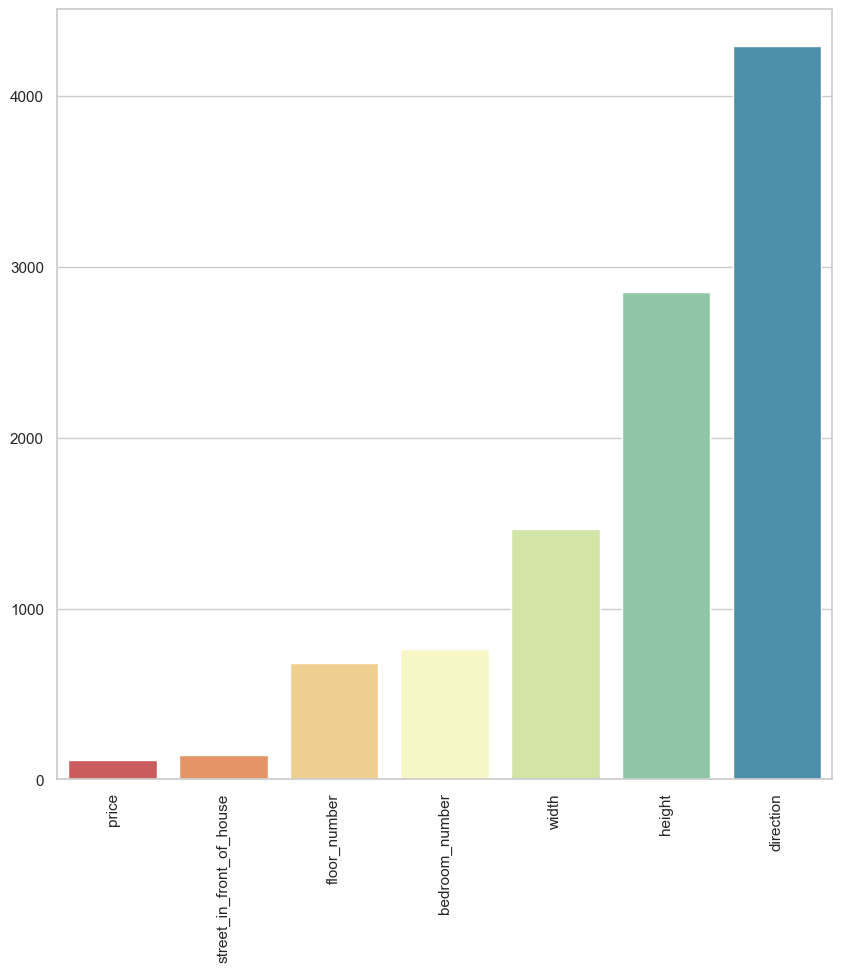

In [26]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace = True)
fig = plt.figure(figsize = (10,10))
sns.set(style = 'whitegrid')
ax = sns.barplot(x = missing.index.tolist(), y = missing, palette = 'Spectral')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

In [27]:
# drop direction column
# df = df.drop(['direction'], axis=1)
df = df[df.price.notna()]

In [28]:
df = df.drop('is_owner', axis = 1)
df

,price,area,floor_number,bedroom_number,is_dinning_room,is_kitchen,is_terrace,is_car_pack,type,direction,street_in_front_of_house,width,height,district
0,10.3,48.0,4.0,4.0,False,False,False,False,Nhà trong hẻm,NaN,3.0,NaN,NaN,Tây Hồ
1,8.8,53.0,5.0,3.0,True,True,True,False,Nhà trong hẻm,Đông Nam,3.0,6.0,9.0,Hai Bà Trưng
2,2.1,66.0,NaN,NaN,False,False,False,False,"Đất thổ cư, đất ở",NaN,5.0,5.0,14.0,Thạch Thất
5,9.6,45.0,5.0,3.0,False,False,False,False,Nhà trong hẻm,NaN,3.0,4.5,NaN,Thanh Xuân
6,3.5,173.0,NaN,NaN,False,False,False,False,"Đất thổ cư, đất ở",NaN,7.0,5.0,34.0,Thạch Thất
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5042,32.0,82.0,8.0,4.0,True,True,True,True,Nhà mặt tiền,NaN,30.0,6.0,NaN,Cầu Giấy
5043,23.0,102.0,5.0,4.0,True,True,True,True,"Biệt thự, nhà liền kề",NaN,50.0,9.2,NaN,Ba Đình
5045,75.0,132.0,6.0,4.0,True,True,True,True,Nhà mặt tiền,NaN,30.0,9.6,NaN,Tây Hồ
5046,48.4,105.0,9.0,4.0,True,True,True,True,Nhà mặt tiền,NaN,40.0,7.1,NaN,Đống Đa


# Numerical and Categorical feature

In [29]:
features_numerical = df.select_dtypes(exclude=['object', 'bool']).copy()
features_numerical.columns

Index(['price', 'area', 'floor_number', 'bedroom_number',
       'street_in_front_of_house', 'width', 'height'],
      dtype='object')

In [30]:
features_categorical = df.select_dtypes(include=['object', 'bool']).copy()
features_categorical.columns

Index(['is_dinning_room', 'is_kitchen', 'is_terrace', 'is_car_pack', 'type',
       'direction', 'district'],
      dtype='object')

# Visualization

## Line plot

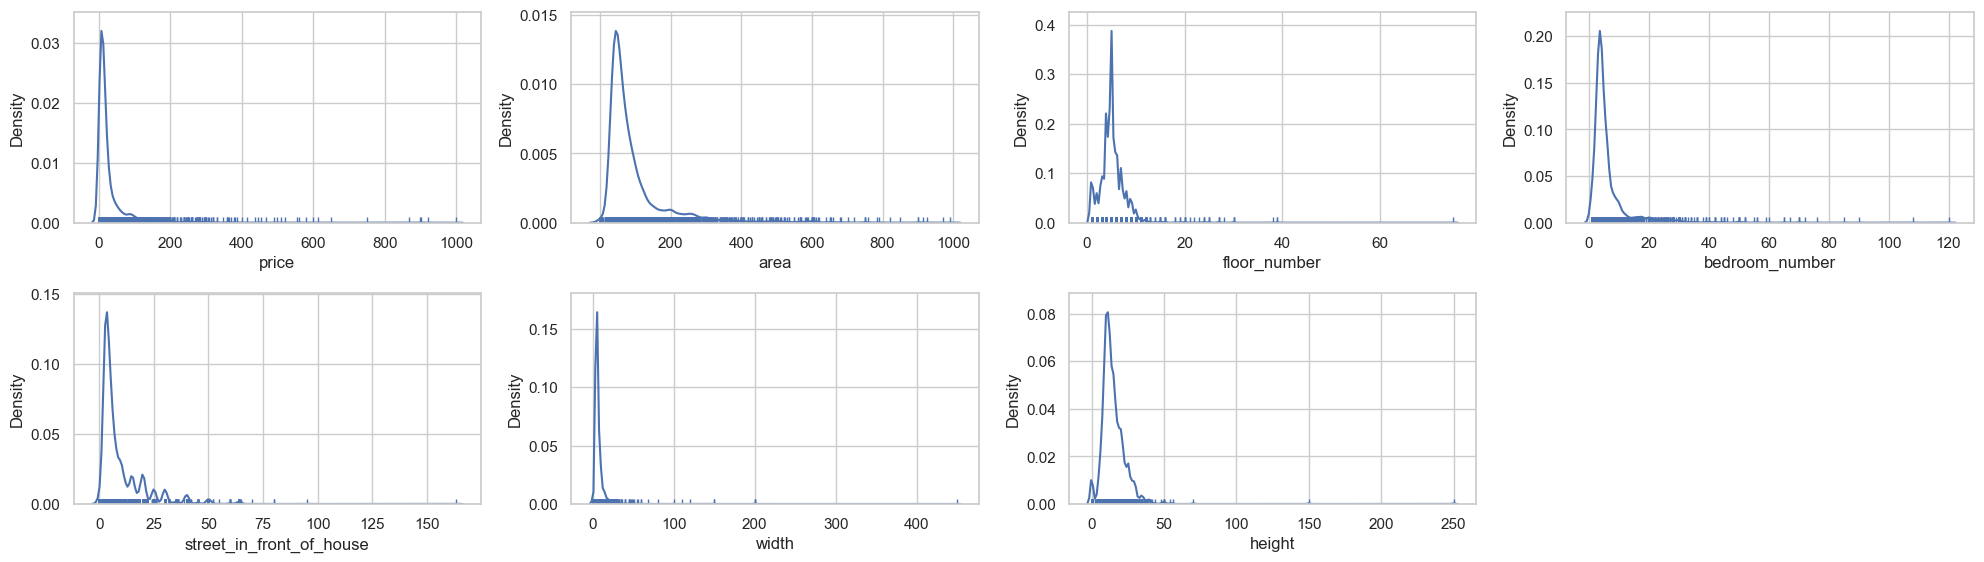

In [31]:
for i in range(len(features_numerical.columns)):
    fig = plt.figure(figsize=(10, 6))
    sns.distplot(features_numerical.iloc[:,i].dropna(), rug=True, hist=False, kde_kws={'bw':0.1}, color='b')
    plt.xlabel(features_numerical.columns[i])
    plt.tight_layout()
    
    # Save each plot with its feature name
    feature_name = features_numerical.columns[i]
    plt.savefig(f'distribution_{feature_name}.png', dpi=300, bbox_inches='tight')
    plt.close(fig)  # Close the figure to free memory

# After saving all individual plots, create the combined figure again if needed
fig = plt.figure(figsize=(20, 25))
sns.set(style='whitegrid')
for i in range(len(features_numerical.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.distplot(features_numerical.iloc[:,i].dropna(), rug=True, hist=False, kde_kws={'bw':0.1}, color='b')
    plt.xlabel(features_numerical.columns[i])
plt.tight_layout()
plt.show()

In [32]:
# Phân bố dữ liệu quá lệch, do đó loại một số outlier
df.drop(df[df.price > 50].index, inplace = True)
# df.drop(df[df.area > 400].index, inplace = True)
# df.drop(df[df.floor_number > 15].index, inplace = True)
# df.drop(df[df.bedroom_number > 30].index, inplace = True)
# df.drop(df[df.street_in_front_of_house > 50].index, inplace = True)
# df.drop(df[df.width > 60].index, inplace = True)
# df.drop(df[df.height > 40].index, inplace = True)

features_numerical = df.select_dtypes(exclude=['object', 'bool']).copy()
features_categorical = df.select_dtypes(include=['object', 'bool']).copy()

df.shape

(3807, 14)

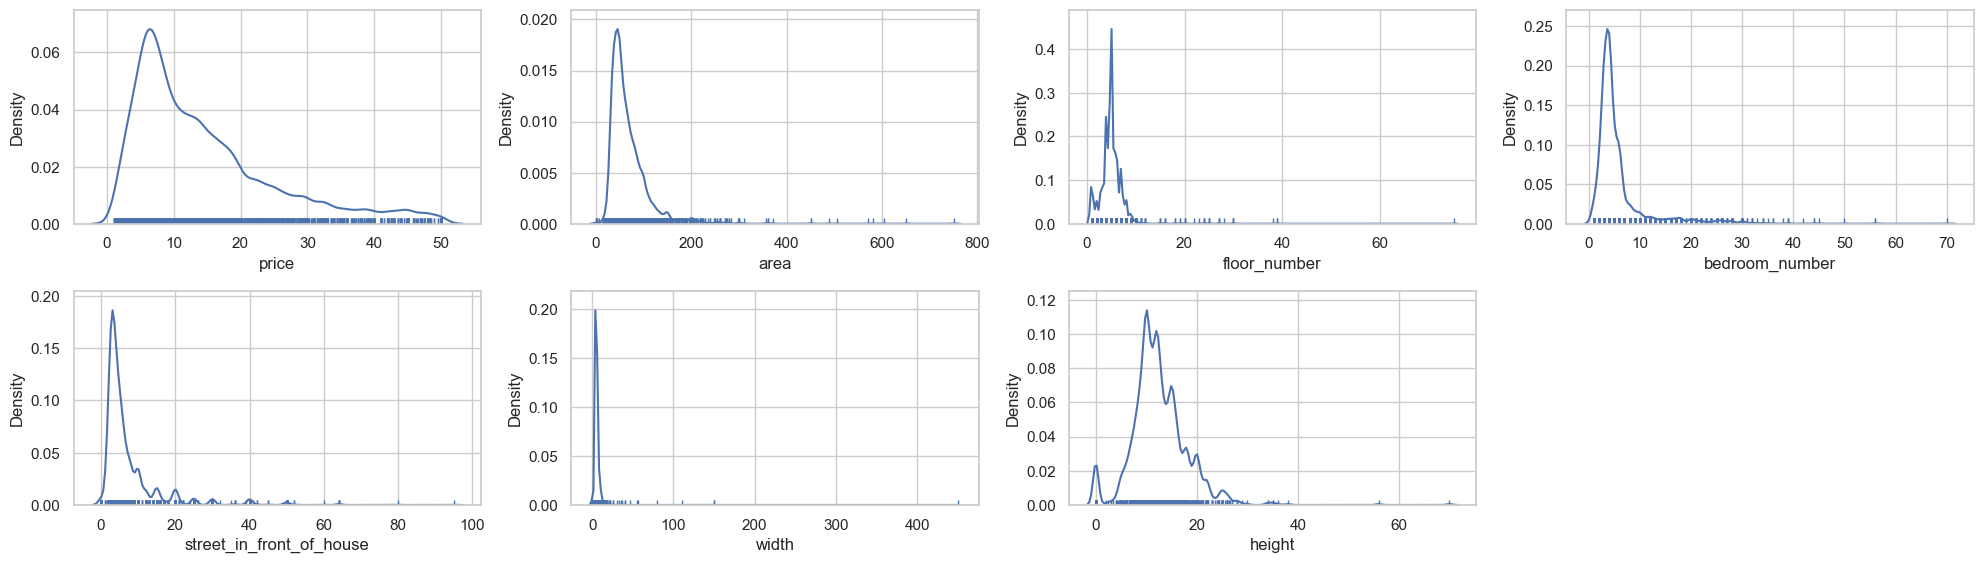

In [33]:
# vẽ lại line plot
fig = plt.figure(figsize = (20,25))
sns.set(style = 'whitegrid')
for i in range(len(features_numerical.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.distplot(features_numerical.iloc[:,i].dropna(), rug = True, hist = False, kde_kws = {'bw':0.1}, color = 'b')
    plt.xlabel(features_numerical.columns[i])
plt.tight_layout()

## Boxplot

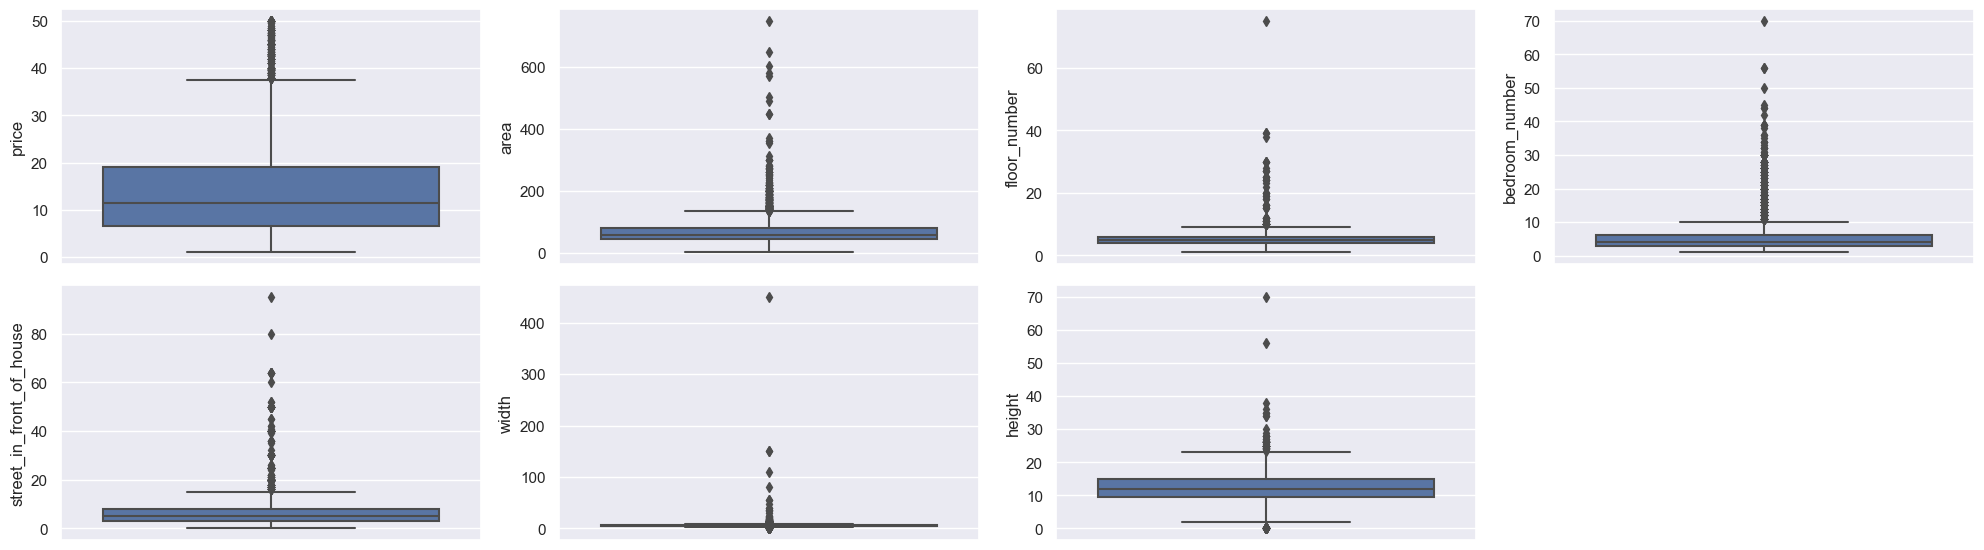

In [34]:
fig = plt.figure(figsize = (20,25))
sns.set(style = 'darkgrid')
for i in range(len(features_numerical.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y = features_numerical.iloc[:,i].dropna())
plt.tight_layout()

## Remove outlier

In [35]:
# df.drop(df[df.price <= 0].index, inplace = True)
# df.drop(df[df.price > 40].index, inplace = True)

df.drop(df[df.area > 400].index, inplace = True)
df.drop(df[df.area <= 0].index, inplace = True)

df.drop(df[df.floor_number > 10].index, inplace = True)
df.drop(df[df.floor_number <= 0].index, inplace = True)

df.drop(df[df.bedroom_number > 10].index, inplace = True)
df.drop(df[df.bedroom_number <= 0].index, inplace = True)

df.drop(df[df.street_in_front_of_house > 25].index, inplace = True)

df.drop(df[df.width > 20].index, inplace = True)
df.drop(df[df.width <= 0].index, inplace = True)

df.drop(df[df.height > 25].index, inplace = True)
df.drop(df[df.height <= 0].index, inplace = True)

features_numerical = df.select_dtypes(exclude=['object', 'bool']).copy()
features_categorical = df.select_dtypes(include=['object', 'bool']).copy()

# df.shape

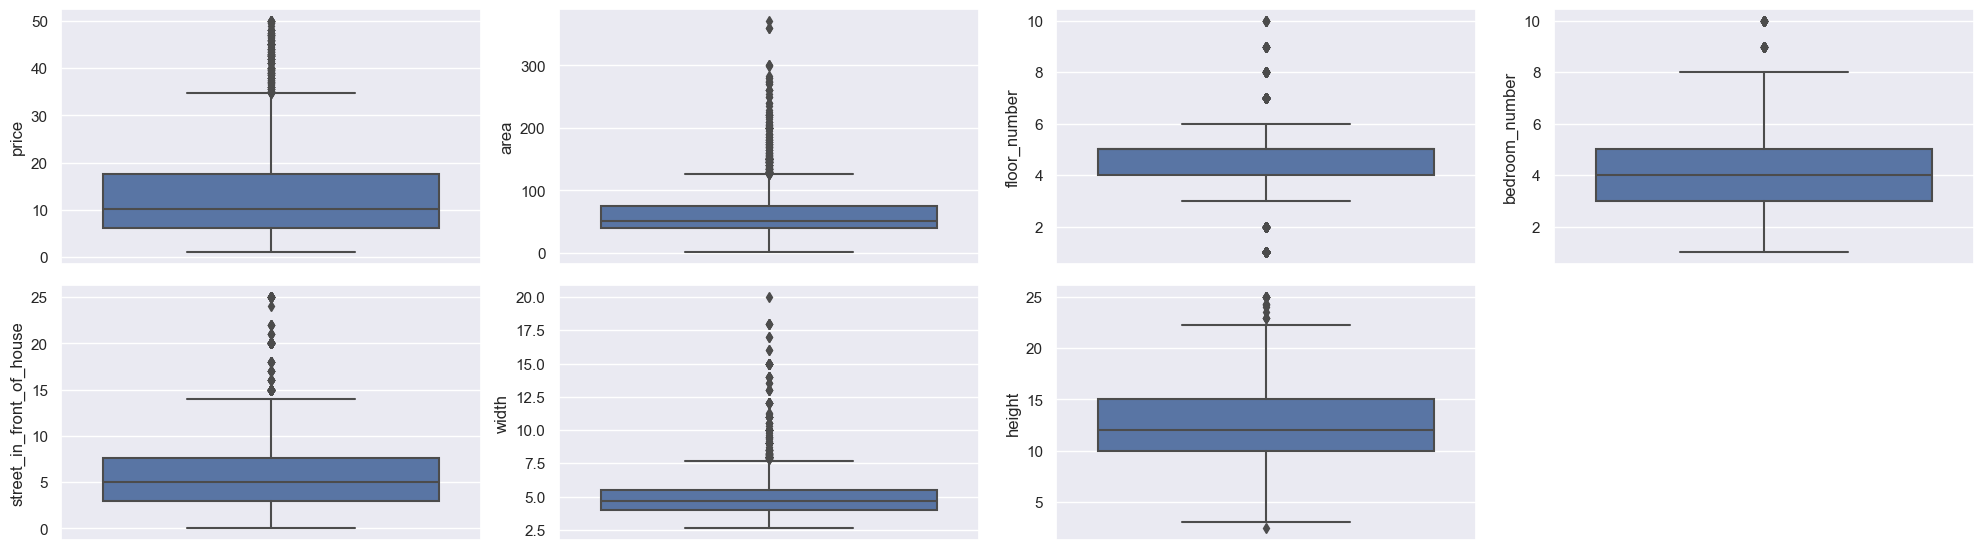

In [36]:
fig = plt.figure(figsize = (20,25))
sns.set(style = 'darkgrid')
for i in range(len(features_numerical.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y = features_numerical.iloc[:,i].dropna())
plt.tight_layout()

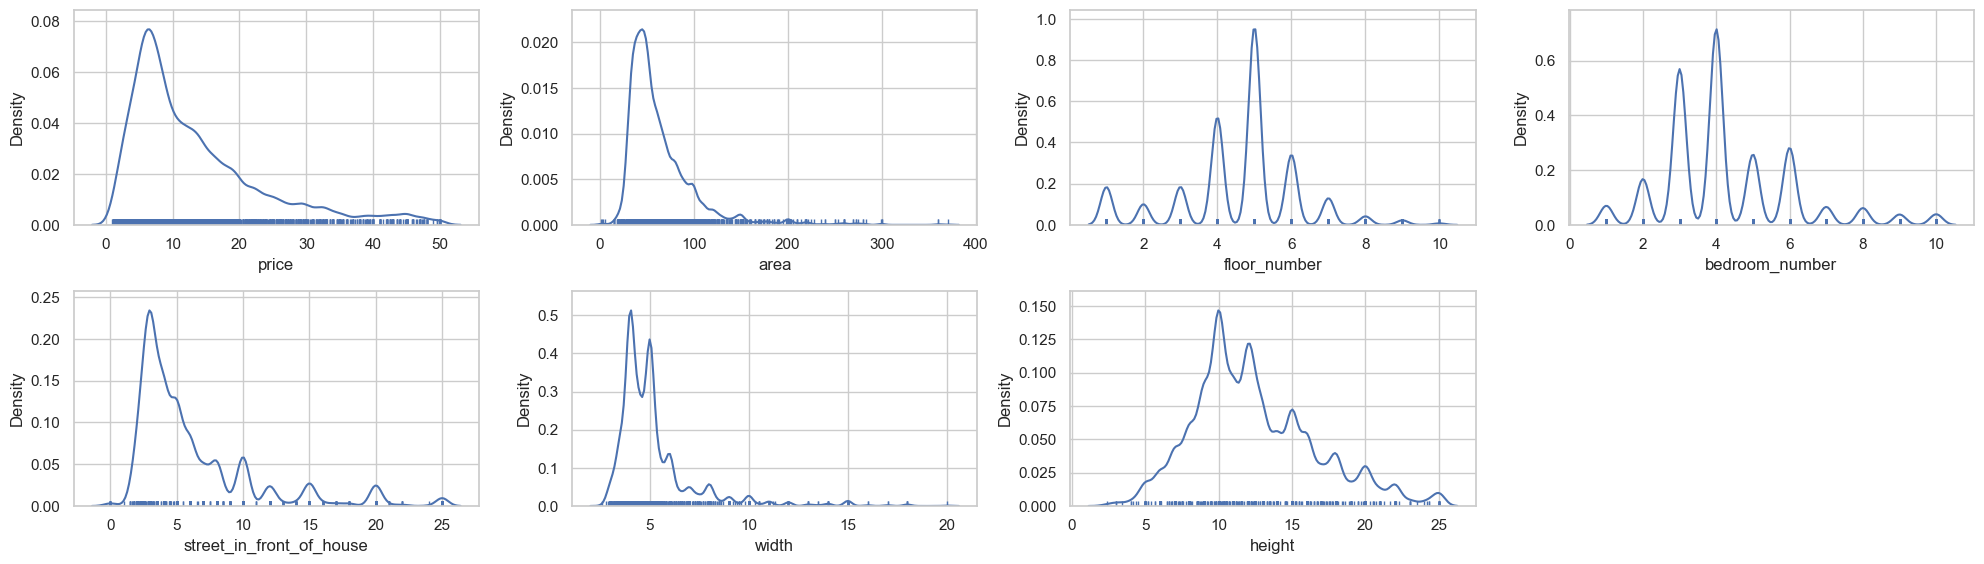

In [37]:
fig = plt.figure(figsize = (20,25))
sns.set(style = 'whitegrid')
for i in range(len(features_numerical.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.distplot(features_numerical.iloc[:,i].dropna(), rug = True, hist = False, kde_kws = {'bw':0.1}, color = 'b')
    plt.xlabel(features_numerical.columns[i])
plt.tight_layout()

## Dropping unnecessary features

In [38]:
correlation = df.select_dtypes(exclude=['object', 'bool']).corr()

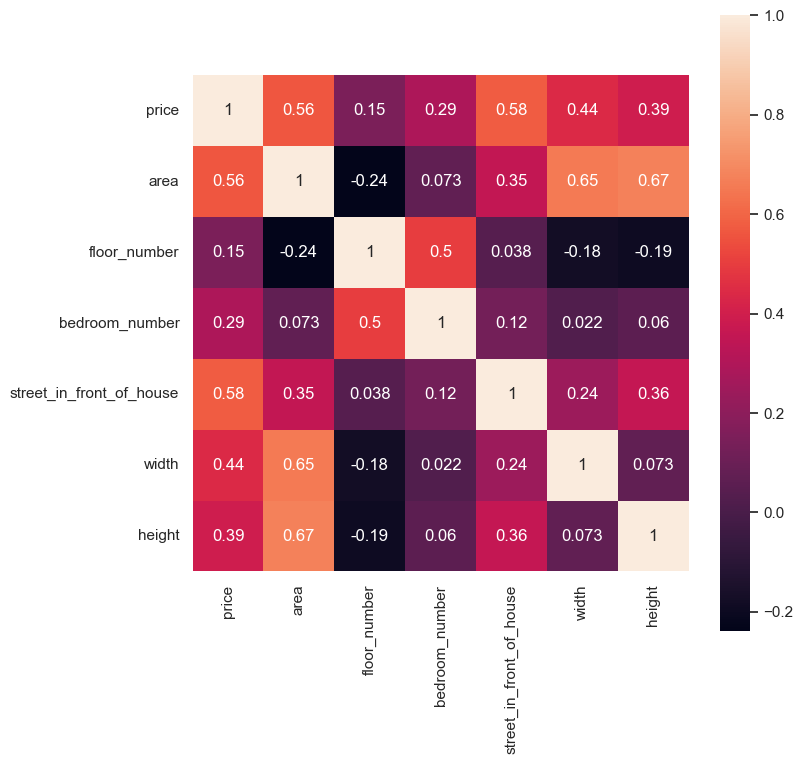

In [39]:
fig = plt.figure(figsize = (8, 8))
sns.heatmap(correlation, annot = True, square = True)
plt.show()

In [40]:
df = df.drop(['height'], axis=1)

In [41]:
df['type'].unique()

array(['Nhà trong hẻm', 'Đất thổ cư, đất ở', 'Căn hộ chung cư',
       'Nhà mặt tiền', 'Phòng trọ, nhà trọ',
       'Đất nền, liền kề, đất dự án', 'Biệt thự, nhà liền kề',
       'Văn phòng', 'Kho, xưởng', 'Shop, kiot, quán',
       'Nhà hàng, khách sạn', 'Đất nông, lâm nghiệp'], dtype=object)

In [42]:
def process_cc(row):
    if row['type'] == 'Căn hộ chung cư' and pd.isna(row['floor_number']):
        row['floor_number'] = 1
    return row
df = df.apply(process_cc, axis=1)


In [43]:
df[df['type'] == 'Căn hộ chung cư'].iloc[0:10]

,price,area,floor_number,bedroom_number,is_dinning_room,is_kitchen,is_terrace,is_car_pack,type,direction,street_in_front_of_house,width,district
11,13.50,121.0,1.0,4.0,True,True,False,True,Căn hộ chung cư,Bắc,5.0,12.0,Hà Đông
57,2.90,54.0,1.0,2.0,True,True,False,False,Căn hộ chung cư,NaN,NaN,NaN,Hoàng Mai
69,3.65,74.0,1.0,3.0,True,True,False,False,Căn hộ chung cư,NaN,NaN,NaN,Hoàng Mai
91,3.35,65.0,1.0,2.0,True,True,True,True,Căn hộ chung cư,NaN,NaN,NaN,Bắc Từ Liêm
127,4.95,67.0,1.0,2.0,True,True,False,True,Căn hộ chung cư,NaN,NaN,NaN,Hoàng Mai
210,7.50,81.0,1.0,2.0,False,False,False,False,Căn hộ chung cư,NaN,8.0,NaN,Bắc Từ Liêm
241,9.30,90.0,1.0,4.0,False,False,False,False,Căn hộ chung cư,NaN,8.0,NaN,Hai Bà Trưng
397,3.35,65.0,10.0,2.0,False,False,False,False,Căn hộ chung cư,NaN,7.0,NaN,Bắc Từ Liêm
428,3.80,72.0,2.0,2.0,True,True,True,False,Căn hộ chung cư,NaN,NaN,5.0,Hai Bà Trưng
447,4.50,72.0,1.0,3.0,True,True,False,True,Căn hộ chung cư,NaN,NaN,8.0,Hoàng Mai


## Fill missing number in numerical features

In [44]:
df.select_dtypes(exclude=['object', 'bool']).isna().mean().sort_values(ascending = False)

width                       0.352143
bedroom_number              0.169596
floor_number                0.156953
street_in_front_of_house    0.030527
price                       0.000000
area                        0.000000
dtype: float64

In [45]:
columns = ['width', 'floor_number', 'bedroom_number', 'street_in_front_of_house', 'price', 'area']
for i in columns:
    imp = impute.SimpleImputer()
    df[i] = imp.fit_transform(np.array(df[i]).reshape(-1,1))
    if i == 'floor_number' or i == 'bedroom_number':
        df[i] = df[i].round()

## Replace missing values in categorical features

In [46]:
df.fillna('None', inplace = True)

In [47]:
features_categorical = df.select_dtypes(include=['object', 'bool'])
features_categorical.columns

Index(['is_dinning_room', 'is_kitchen', 'is_terrace', 'is_car_pack', 'type',
       'direction', 'district'],
      dtype='object')

In [48]:
df['type'].value_counts()

type
Nhà trong hẻm                  1771
Đất thổ cư, đất ở               588
Nhà mặt tiền                    490
Biệt thự, nhà liền kề           197
Căn hộ chung cư                 115
Phòng trọ, nhà trọ               36
Văn phòng                        22
Đất nền, liền kề, đất dự án      18
Kho, xưởng                        2
Shop, kiot, quán                  2
Nhà hàng, khách sạn               1
Đất nông, lâm nghiệp              1
Name: count, dtype: int64

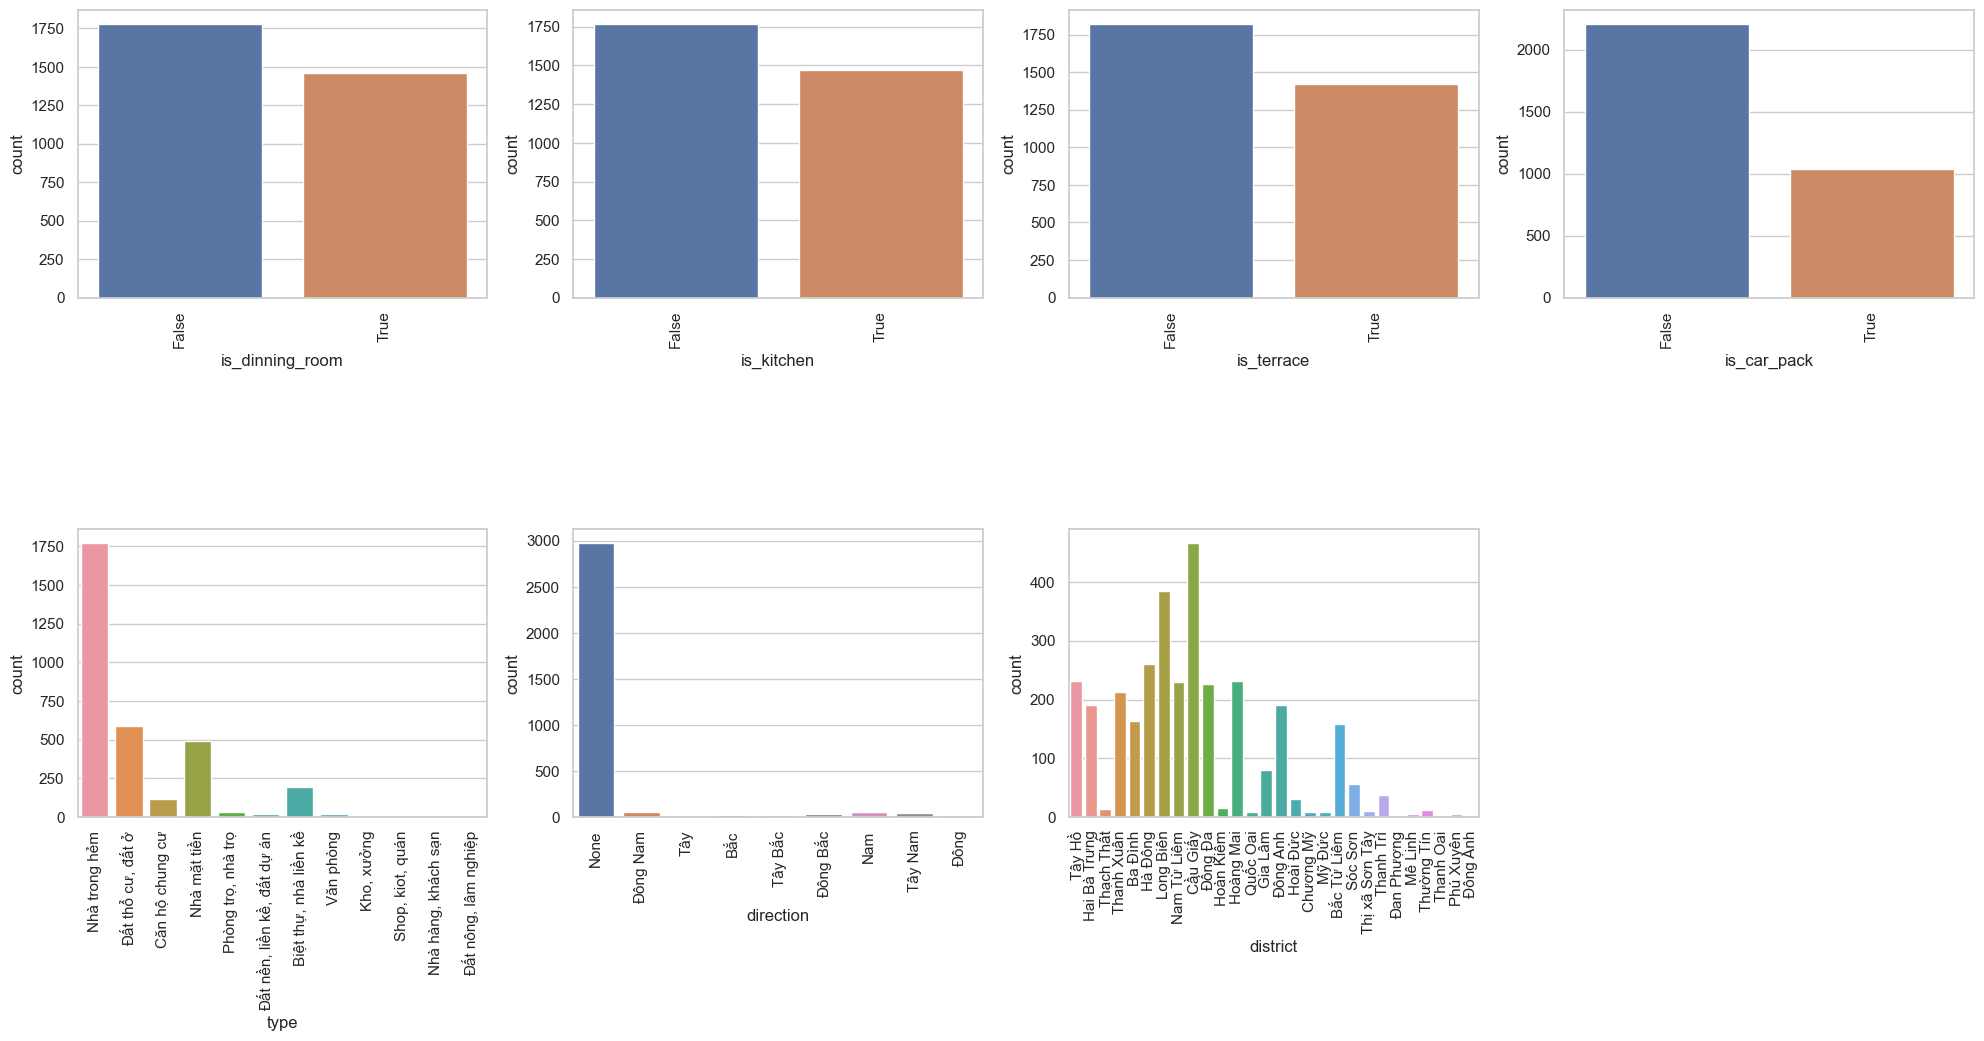

In [49]:
fig = plt.figure(figsize = (20,50))
for i in range(len(features_categorical.columns)):
    fig.add_subplot(10, 4, i+1)
    ax = sns.countplot(x=features_categorical.iloc[:,i].dropna())
    plt.xticks(rotation = 90)
plt.tight_layout()

In [50]:
df = df.drop('direction', axis = 1)
df

,price,area,floor_number,bedroom_number,is_dinning_room,is_kitchen,is_terrace,is_car_pack,type,street_in_front_of_house,width,district
0,10.3,48.0,4.0,4.0,False,False,False,False,Nhà trong hẻm,3.0,5.180581,Tây Hồ
1,8.8,53.0,5.0,3.0,True,True,True,False,Nhà trong hẻm,3.0,6.000000,Hai Bà Trưng
2,2.1,66.0,5.0,4.0,False,False,False,False,"Đất thổ cư, đất ở",5.0,5.000000,Thạch Thất
5,9.6,45.0,5.0,3.0,False,False,False,False,Nhà trong hẻm,3.0,4.500000,Thanh Xuân
7,10.8,40.0,7.0,10.0,True,True,True,True,Nhà trong hẻm,3.0,5.000000,Ba Đình
...,...,...,...,...,...,...,...,...,...,...,...,...
5029,6.0,35.0,5.0,3.0,True,True,True,True,Nhà trong hẻm,10.0,4.000000,Đống Đa
5030,6.4,33.0,5.0,3.0,True,True,True,True,Nhà trong hẻm,10.0,5.000000,Ba Đình
5031,8.2,42.0,5.0,4.0,True,True,True,True,Nhà trong hẻm,10.0,5.000000,Ba Đình
5032,6.4,38.0,4.0,4.0,True,True,True,True,Nhà trong hẻm,10.0,4.000000,Đống Đa


In [51]:
def process_type(row):
    if row['type'] not in ['Căn hộ chung cư', 'Nhà trong hẻm']:
        row['type'] = 'Nhà mặt phố'
    return row
df = df.apply(process_type, axis=1)
df['type'].value_counts()

type
Nhà trong hẻm      1771
Nhà mặt phố        1357
Căn hộ chung cư     115
Name: count, dtype: int64

In [52]:
df.shape

(3243, 12)

In [53]:
features_categorical = df.select_dtypes(include=['object', 'bool'])
features_categorical.columns

Index(['is_dinning_room', 'is_kitchen', 'is_terrace', 'is_car_pack', 'type',
       'district'],
      dtype='object')

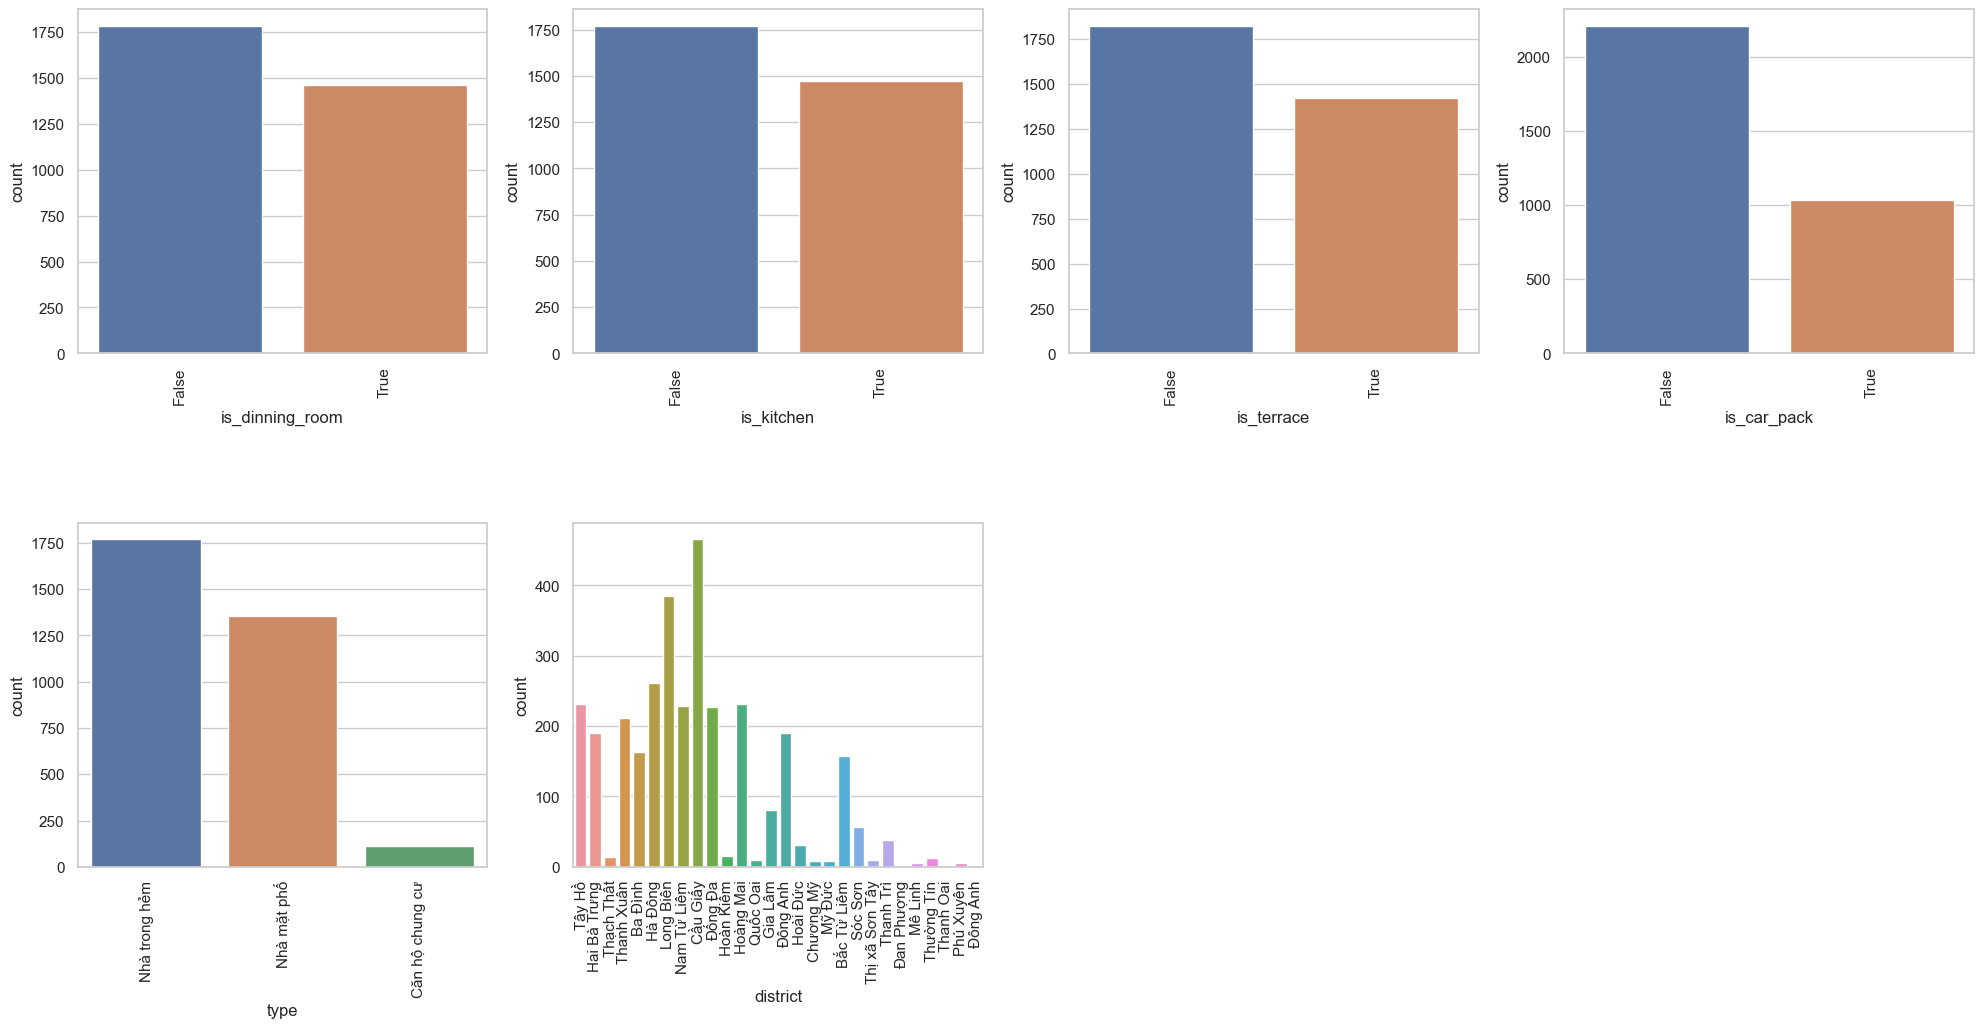

In [54]:
fig = plt.figure(figsize = (20,50))
for i in range(len(features_categorical.columns)):
    fig.add_subplot(10, 4, i+1)
    ax = sns.countplot(x=features_categorical.iloc[:,i].dropna())
    plt.xticks(rotation = 90)
plt.tight_layout()

In [55]:
df.district.value_counts()

district
Cầu Giấy          466
Long Biên         385
Hà Đông           261
Tây Hồ            232
Hoàng Mai         231
Nam Từ Liêm       229
Đống Đa           227
Thanh Xuân        212
Hai Bà Trưng      190
Đông Anh          190
Ba Đình           163
Bắc Từ Liêm       158
Gia Lâm            81
Sóc Sơn            56
Thanh Trì          38
Hoài Đức           31
Hoàn Kiếm          16
Thạch Thất         14
Thường Tín         12
Thị xã Sơn Tây     10
Quốc Oai            9
Mỹ Đức              8
Chương Mỹ           8
Mê Linh             6
Phú Xuyên           5
Đan Phượng          2
Thanh Oai           2
 Đông Anh           1
Name: count, dtype: int64

In [56]:
def process_district(row):
    if row['district'] not in ['Long Biên', 'Hoàng Mai', 'Nam Từ Liêm', 'Bắc Từ Liêm', 'Đống Đa', 'Hai Bà Trưng', 'Thanh Xuân', 'Cầu Giấy', 'Tây Hồ','Đông Anh','Gia Lâm','Hà Đông','Hoàn Kiếm','Ba Đình']:
        row['district'] = 'Ngoại thành'
    return row
df = df.apply(process_district, axis=1)
df.district.value_counts()


district
Cầu Giấy        466
Long Biên       385
Hà Đông         261
Tây Hồ          232
Hoàng Mai       231
Nam Từ Liêm     229
Đống Đa         227
Thanh Xuân      212
Ngoại thành     202
Hai Bà Trưng    190
Đông Anh        190
Ba Đình         163
Bắc Từ Liêm     158
Gia Lâm          81
Hoàn Kiếm        16
Name: count, dtype: int64

In [57]:
df.columns

Index(['price', 'area', 'floor_number', 'bedroom_number', 'is_dinning_room',
       'is_kitchen', 'is_terrace', 'is_car_pack', 'type',
       'street_in_front_of_house', 'width', 'district'],
      dtype='object')

In [58]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
df['is_dinning_room'] = label_encoder.fit_transform(df['is_dinning_room'])
df['is_kitchen'] = label_encoder.fit_transform(df['is_kitchen'])
df['is_terrace'] = label_encoder.fit_transform(df['is_terrace'])
df['is_car_pack'] = label_encoder.fit_transform(df['is_car_pack'])
#  df['type'] = label_encoder.fit_transform(df['type'])
#  df['district'] = label_encoder.fit_transform(df['district'])



In [59]:
df.iloc[0:10]

,price,area,floor_number,bedroom_number,is_dinning_room,is_kitchen,is_terrace,is_car_pack,type,street_in_front_of_house,width,district
0,10.30,48.0,4.0,4.0,0,0,0,0,Nhà trong hẻm,3.0,5.180581,Tây Hồ
1,8.80,53.0,5.0,3.0,1,1,1,0,Nhà trong hẻm,3.0,6.000000,Hai Bà Trưng
2,2.10,66.0,5.0,4.0,0,0,0,0,Nhà mặt phố,5.0,5.000000,Ngoại thành
5,9.60,45.0,5.0,3.0,0,0,0,0,Nhà trong hẻm,3.0,4.500000,Thanh Xuân
7,10.80,40.0,7.0,10.0,1,1,1,1,Nhà trong hẻm,3.0,5.000000,Ba Đình
9,2.25,79.0,5.0,4.0,0,0,0,0,Nhà mặt phố,5.0,5.000000,Ngoại thành
11,13.50,121.0,1.0,4.0,1,1,0,1,Căn hộ chung cư,5.0,12.000000,Hà Đông
12,30.00,55.0,9.0,8.0,1,1,1,1,Nhà mặt phố,10.0,5.000000,Hà Đông
13,6.65,36.0,5.0,3.0,0,0,0,0,Nhà trong hẻm,2.0,5.180581,Long Biên
15,10.00,45.0,5.0,6.0,0,0,0,0,Nhà trong hẻm,3.0,5.000000,Thanh Xuân


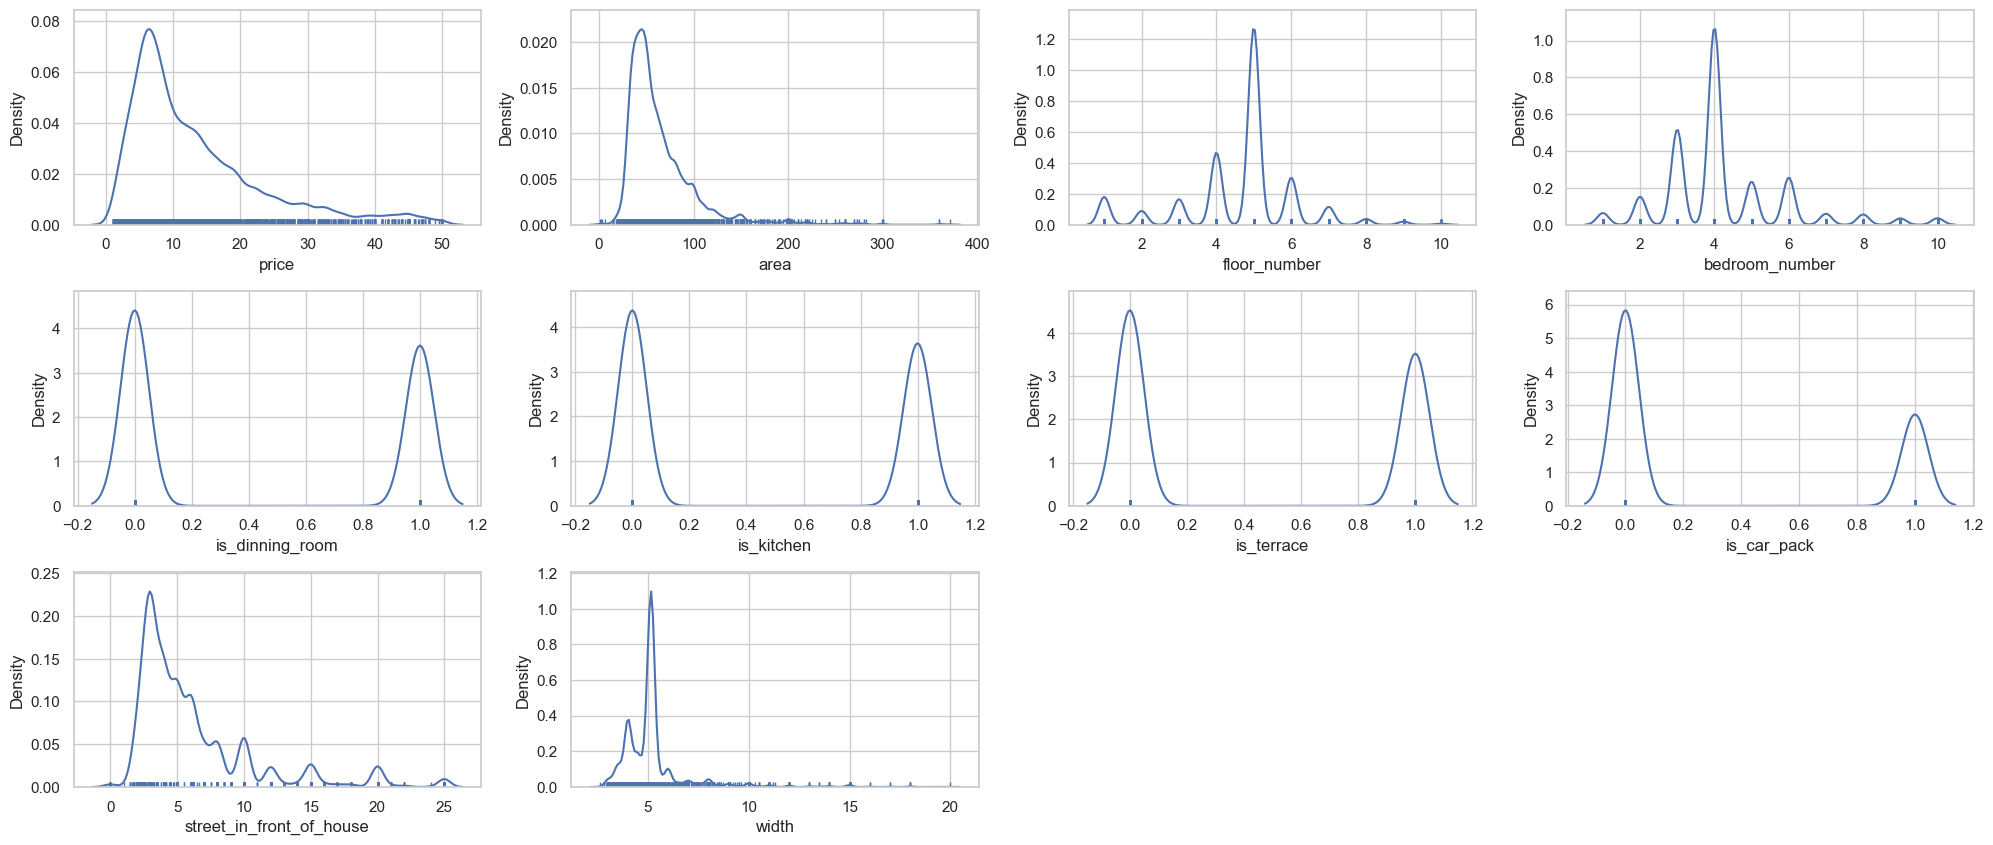

In [60]:
features_numerical = df.select_dtypes(exclude=['object', 'bool']).copy()

fig = plt.figure(figsize = (20,25))
sns.set(style = 'whitegrid')
for i in range(len(features_numerical.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.distplot(features_numerical.iloc[:,i].dropna(), rug = True, hist = False, kde_kws = {'bw':0.1}, color = 'b')
    plt.xlabel(features_numerical.columns[i])
plt.tight_layout()

In [61]:
df.shape

(3243, 12)

In [74]:
correlation = df.select_dtypes(exclude=['object', 'bool']).corr()

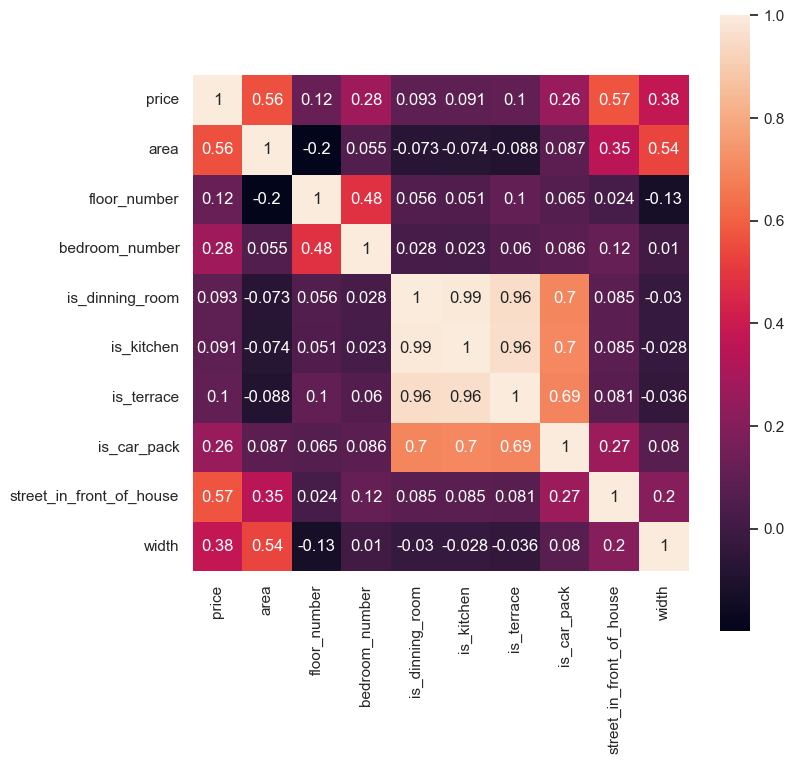

In [75]:
fig = plt.figure(figsize = (8, 8))
sns.heatmap(correlation, annot = True, square = True)

plt.savefig('correlation.png', dpi=300, bbox_inches='tight')
plt.show()

In [62]:
df.to_csv('data/clean_data.csv', index=False)

In [63]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size=0.8, random_state=169)
df_train, df_val = train_test_split(df_train, train_size=0.75, random_state=169)

In [64]:
df_train.shape, df_val.shape, df_test.shape

((1945, 12), (649, 12), (649, 12))

In [65]:
df_train.to_csv('data/train.csv', index=False)
df_val.to_csv('data/val.csv', index=False)
df_test.to_csv('data/test.csv', index=False)

In [66]:
df_train

,price,area,floor_number,bedroom_number,is_dinning_room,is_kitchen,is_terrace,is_car_pack,type,street_in_front_of_house,width,district
522,23.90,80.0,6.0,6.0,1,1,1,1,Nhà mặt phố,8.0,5.000000,Long Biên
2576,7.40,59.0,5.0,4.0,0,0,0,0,Nhà mặt phố,3.0,5.180581,Bắc Từ Liêm
4112,8.40,45.0,4.0,4.0,0,0,0,0,Nhà trong hẻm,3.0,5.180581,Thanh Xuân
2837,5.25,35.0,4.0,3.0,1,1,1,0,Nhà trong hẻm,2.5,3.300000,Hà Đông
4620,26.00,55.0,9.0,7.0,1,1,1,1,Nhà trong hẻm,7.0,5.180581,Thanh Xuân
...,...,...,...,...,...,...,...,...,...,...,...,...
3111,12.00,50.0,5.0,4.0,0,0,0,0,Nhà mặt phố,4.0,4.200000,Tây Hồ
4483,30.00,95.0,5.0,6.0,0,0,0,0,Nhà trong hẻm,20.0,9.000000,Ba Đình
3209,27.00,260.0,5.0,4.0,0,0,0,0,Nhà mặt phố,3.0,15.000000,Nam Từ Liêm
504,12.00,46.0,6.0,8.0,1,1,1,0,Nhà trong hẻm,3.0,4.200000,Thanh Xuân


# Tạo file để tạo contest kaggle

In [67]:
price = df_test['price'].tolist()
df_test = df_test.drop(['price'], axis=1)


In [68]:
df_test.to_csv('data/test.csv', index=False)

In [69]:
df_test = pd.read_csv('data/test.csv')

In [70]:
df_test

,area,floor_number,bedroom_number,is_dinning_room,is_kitchen,is_terrace,is_car_pack,type,street_in_front_of_house,width,district
0,50.0,7.0,3.0,1,1,1,1,Nhà mặt phố,9.000000,4.000000,Hà Đông
1,36.0,5.0,3.0,1,1,1,0,Nhà trong hẻm,3.000000,4.000000,Cầu Giấy
2,90.0,6.0,4.0,1,1,1,1,Nhà mặt phố,12.000000,5.000000,Long Biên
3,80.0,1.0,4.0,0,0,0,0,Nhà mặt phố,6.000000,5.000000,Ngoại thành
4,35.0,5.0,4.0,0,0,0,0,Nhà trong hẻm,7.000000,5.180581,Nam Từ Liêm
...,...,...,...,...,...,...,...,...,...,...,...
644,50.0,1.0,3.0,1,1,1,1,Nhà trong hẻm,4.000000,4.600000,Nam Từ Liêm
645,85.0,2.0,2.0,0,0,0,0,Căn hộ chung cư,5.000000,5.180581,Đống Đa
646,35.0,5.0,4.0,1,1,1,0,Nhà trong hẻm,4.000000,4.200000,Hà Đông
647,70.0,5.0,4.0,0,0,0,0,Nhà mặt phố,6.154517,5.180581,Đống Đa


In [71]:
solution = pd.DataFrame({
    "Id": df_test.index,
    "Usage": "Public",
    "TARGET": price
})

In [72]:
solution.to_csv('data/solution.csv', index=False)

In [73]:
rand_submission = pd.DataFrame({
    "Id": df_test.index,
    "TARGET": np.random.randint(0, 100, size=len(df_test))
})
rand_submission.to_csv('data/rand_submission.csv', index=False)